# Analiza ponudbe stanovanj v Ljubljani

V projektni nalogi bomo analizirali ponudbo stanovanj v Ljubljani.

## Pridobivanje podatkov

Tabela o ponudbi stanovanj se nahaja v *obdelani_podatki/stanovanja.csv*. Podatke smo pridobili s spletne strani https://www.nepremicnine.net/oglasi-prodaja/ljubljana-mesto/stanovanje/. Regularni izrazi in koda, s katero smo pridobili podatke, so zapisani v datoteki *uvoz_podatkov.py*.

Za vsako stanovanje smo pridobili naslednje podatke:
- id stanovanja,
- upravno enoto, v kateri se stanovanje nahaja,
- tip stanovanja,
- leto gradnje,
- leto adaptacije,
- nadstropje,
- velikost stanovanja,
- ceno,
- agencijo, ki stanovanje ponuja,
- kratek opis stanovanja.

## Hipoteze

S pomočjo urejenih podatkov bomo poskušali analizirati:
- na katerih območjih je ponudba največja?
- ali se prodaja več stanovanj v blokih ali v hišah?
- ali leto gradnje vpliva na ceno?
- ali se cena stanovanja res povečuje z velikostjo?
- kje so najdražja stanovanja?
- katera agencija ima v lasti največ ponudb?
...


## Analiza podatkov

In [21]:
# naložimo paket pandas
import pandas as pd

# vključimo risanje grafov
%matplotlib inline

# naložimo razpredelnico, s katero bomo delali
stanovanja = pd.read_csv('obdelani_podatki/stanovanja.csv', index_col='id')

# ponazorimo podatke
stanovanja

,obmocje,tip,leto,adaptirano,nadstropje,velikost,cena,agencija,opis
id,,,,,,,,,
6204808,BS 3,trisobno,1978,2017.0,4,73.50,199900.00,Studio 68 d.o.o.,"73,5 m2, 3-sobno, penthouse, zgrajeno l. 1978,..."
6219729,ČRNUČE,enosobno,1975,NaN,2,40.90,106000.00,MKA nepremičnine d.o.o.,"40,9 m2, 1-sobno, zgrajeno l. 1975, 2/5 nad., ..."
6207003,DOLGI MOST,garsonjera,2003,NaN,P,30.00,111500.00,Mreža nepremičnin d.o.o.,"30 m2, garsonjera, zgrajena l. 2003, P/2 nad.,..."
6219793,LJ. BEŽIGRAD,štirisobno,1992,NaN,None,123.23,437000.00,"STAN nepremičnine d.o.o., Ljubljana","123,23 m2, 4-sobno, zgrajeno l. 1992, Za vas p..."
6217083,LJ. CENTER,trisobno,1929,NaN,None,76.03,247000.00,"STAN nepremičnine d.o.o., Ljubljana","76,03 m2, 3-sobno, zgrajeno l. 1929, Si želite..."
6190628,LJ. CENTER,štirisobno,2019,NaN,P,137.28,654620.00,"Stoja trade, d.o.o., Ljubljana","137,28 m2, 4-sobno, zgrajeno l. 2019, 76 m2 ze..."
6102974,LJ. CENTER,petsobno,2017,NaN,M,220.00,770000.00,Hiša Invest d.o.o.,"220 m2, 5 in večsobno, penthouse, zgrajeno l. ..."
6112172,LJ. CENTER,štiriinpolsobno,1937,2015.0,1,173.60,550000.00,Harmonija nepremičnine Ksenja Kokalj s.p.,"173,6 m2, 4,5-sobno, zgrajeno l. 1937, adaptir..."
6172073,LJ. CENTER,trisobno,2009,NaN,P,115.30,268000.00,AJT d.o.o.,"115,3 m2, 3-sobno, zgrajeno l. 2009, pritličje..."


### Ponudba in povprečna cena kvadratnega metra glede na območje

Poglejmo koliko ponudb stanovanj imamo v katerem delu Ljubljane.

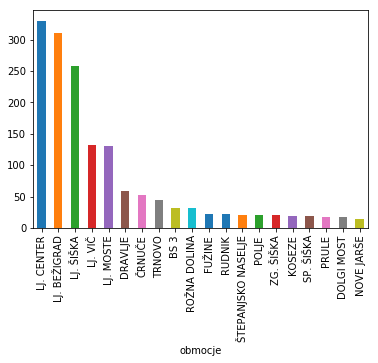

In [22]:
stanovanja.groupby('obmocje').size().sort_values(ascending=False)[:20].plot.bar()

Presenetljivo je, da je največja ponudba stanovanj v območju Ljubljana Center. Podatke o območju smo pridobili iz naslova oglasa, zato je možno, da prodajalci pod območje Ljubljana Center, zajemajo večjo površino Ljubljane, da je oglas bolj privlačen za kupce.

Poglejmo na katerem območju so stanovanja najcenejša in na katerem najdražja.

Ustvarimo nov stolpec "cena/m^2" v razpredelnici stanovanja, da bomo lahko ustrezno primerjali cene.

In [23]:
stanovanja['cena/m^2'] = (stanovanja['cena']/stanovanja['velikost']).round(2)
stanovanja.head(5)

,obmocje,tip,leto,adaptirano,nadstropje,velikost,cena,agencija,opis,cena/m^2
id,,,,,,,,,,
6204808,BS 3,trisobno,1978,2017.0,4,73.50,199900.0,Studio 68 d.o.o.,"73,5 m2, 3-sobno, penthouse, zgrajeno l. 1978,...",2719.73
6219729,ČRNUČE,enosobno,1975,NaN,2,40.90,106000.0,MKA nepremičnine d.o.o.,"40,9 m2, 1-sobno, zgrajeno l. 1975, 2/5 nad., ...",2591.69
6207003,DOLGI MOST,garsonjera,2003,NaN,P,30.00,111500.0,Mreža nepremičnin d.o.o.,"30 m2, garsonjera, zgrajena l. 2003, P/2 nad.,...",3716.67
6219793,LJ. BEŽIGRAD,štirisobno,1992,NaN,None,123.23,437000.0,"STAN nepremičnine d.o.o., Ljubljana","123,23 m2, 4-sobno, zgrajeno l. 1992, Za vas p...",3546.21
6217083,LJ. CENTER,trisobno,1929,NaN,None,76.03,247000.0,"STAN nepremičnine d.o.o., Ljubljana","76,03 m2, 3-sobno, zgrajeno l. 1929, Si želite...",3248.72


Gledali bomo samo tista območja za katera je v ponudbi 5 ali več stanovanj, da bo analiza bolj ustrezna.

In [24]:
obmocja_vec_ponudbe = stanovanja.groupby('obmocje').size().sort_values(ascending=False)[:35].index
obmocja_vec_ponudbe

Index(['LJ. CENTER', 'LJ. BEŽIGRAD', 'LJ. ŠIŠKA', 'LJ. VIČ', 'LJ. MOSTE',
       'DRAVLJE', 'ČRNUČE', 'TRNOVO', 'BS 3', 'ROŽNA DOLINA', 'FUŽINE',
       'RUDNIK', 'ŠTEPANJSKO NASELJE', 'POLJE', 'ZG. ŠIŠKA', 'KOSEZE',
       'SP. ŠIŠKA', 'PRULE', 'DOLGI MOST', 'NOVE JARŠE', 'ZALOG',
       'ZUPANČIČEVA JAMA', 'ŠENTVID', 'TACEN', 'PODUTIK', 'VEVČE', 'KODELJEVO',
       'KOLEZIJA', 'SAVSKO NASELJE', 'STARA LJ.', 'STOŽICE', 'BRDO', 'JARŠE',
       'MURGLE', 'SAVLJE'],
      dtype='object', name='obmocje')

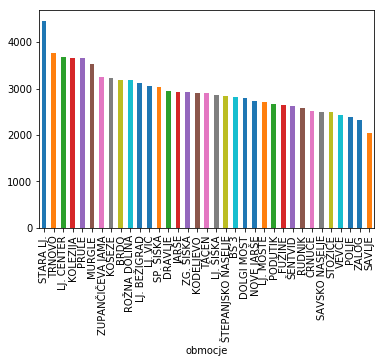

In [25]:
stanovanja[stanovanja['obmocje'].isin(obmocja_vec_ponudbe)].groupby('obmocje').mean()['cena/m^2'].sort_values(ascending=False).round(2).plot.bar()

In [26]:
cena_obmocje = stanovanja[stanovanja['obmocje'].isin(obmocja_vec_ponudbe)].groupby('obmocje').mean()['cena/m^2'].sort_values(ascending=False).round(2)
print(cena_obmocje.head(6))
print(cena_obmocje.tail(3))

obmocje
STARA LJ.     4458.11
TRNOVO        3774.19
LJ. CENTER    3669.05
KOLEZIJA      3659.24
PRULE         3651.40
MURGLE        3535.32
Name: cena/m^2, dtype: float64
obmocje
POLJE     2386.64
ZALOG     2316.01
SAVLJE    2042.14
Name: cena/m^2, dtype: float64


Opazimo, da je v povprečju najdražji kvadratni meter v Stari Ljubljani s 4458.11 €, kar ni presenetljivo. Sledi Trnovo, Ljubljana Center, Kolezija, Prule, Murgle itd. Preseneča nas območja Murgle na šestem mestu, saj velja za eno izmed območij z najdražjimi nepremičninami. Eden izmed razlogov je v naših podatkih, saj je v Murglah manj stanovanj v ponudbi kot hiš, ki pa jih v naši analizi ne upoštevamo. Drugi razlog bi lahko bila povečana gradnja novih stanovanj v preteklih letih na območju Trnovo in Prule.
Najnižja povprečna cena kvadratnega metra je v Polju, Zalogu in Savljah, kar je tudi predvidljivo, saj so to stanovanja, ki so najbolj oddaljena od središča mesta. Zanimivo je, da cena pade za polovico vrednosti najdražjega kvadratnega metra.

### Cena stanovanj glede na velikost

Zanima nas ali je cena stanovanja višja, če ima stanovanje več kvadratnih metrov. 

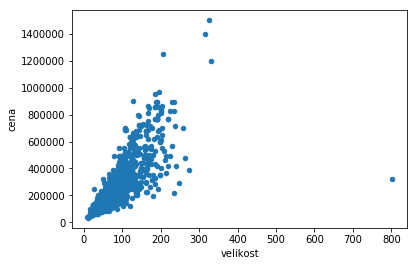

In [27]:
stanovanja.plot.scatter('velikost', 'cena')

Čeprav so podatki zelo heteroskedastični in linearna regresija ni najboljša izbira za korelacijo med spremenljivkami, površno lahko rečemo, da cena res narašča z velikostjo in potrdimo našo hipotezo.
Stanovanje, ki naj bi imelo več kot 800 kvadratnih metrov, ima v resnici 80,9 kvadaratnih metrov. Prišlo je do tiskarske napake na strani, zato lahko to piko zanemarimo.

### Cena stanovanj glede na leto gradnje

Preverimo našo hipotezo, da je cena stanovanja odvisna od leta gradnje.

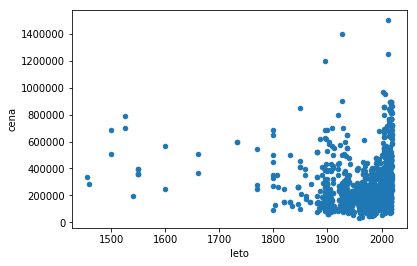

In [30]:
stanovanja.plot.scatter('leto', 'cena')